In [16]:
import requests
from requests.exceptions import HTTPError
from bs4 import BeautifulSoup as bs


In [ ]:
# r = requests.get('https://www.skinnytaste.com/recipe-index')

# if r.status_code==200:
#   print("Success")
# else:
#   print("Failed")
  
# soup = bs(r.text,'html.parser')
# print(soup.prett)

In [25]:
pages=50
scraped_recipes=[]
for i in range(1,pages+1):
  try:
    r = requests.get(f'https://www.skinnytaste.com/recipe-index/?_paged={i}')
    print(f"Page {i}")
    r.raise_for_status()
    soup = bs(r.text,'html.parser')
    recipe_card=soup.select('.post-content')
    print(f"{len(recipe_card)} found on page {i}")
    scraped_recipes.extend(recipe_card)
    print("success")
    print(f"Items so far {len(scraped_recipes)} ")
    print("\n----------\n")
  except HTTPError as http_error:
    print(f"HTTP error occurred: {http_error} - {i} - request")
  except Exception as err:
    print(f"Unknown occurred: {err} ---- {i} - request")
    
  
  
  

Page 1
20 found on page 1
success
Items so far 20 

----------

Page 2
20 found on page 2
success
Items so far 40 

----------

Page 3
20 found on page 3
success
Items so far 60 

----------

Page 4
20 found on page 4
success
Items so far 80 

----------

Page 5
20 found on page 5
success
Items so far 100 

----------

Page 6
20 found on page 6
success
Items so far 120 

----------

Page 7
20 found on page 7
success
Items so far 140 

----------

Page 8
20 found on page 8
success
Items so far 160 

----------

Page 9
20 found on page 9
success
Items so far 180 

----------

Page 10
20 found on page 10
success
Items so far 200 

----------

Page 11
20 found on page 11
success
Items so far 220 

----------

Page 12
20 found on page 12
success
Items so far 240 

----------

Page 13
20 found on page 13
success
Items so far 260 

----------

Page 14
20 found on page 14
success
Items so far 280 

----------

Page 15
20 found on page 15
success
Items so far 300 

----------

Page 16
20 found 

In [26]:

len(scraped_recipes)

1000

In [41]:
recipe_url = scraped_recipes[3].find('a')['href']
recipe_request = requests.get(recipe_url)
recipe_request.raise_for_status()
recipe_soup=bs(recipe_request.text,'html.parser')
recipe_details = recipe_soup.find('div',class_='content-area')


In [50]:
float(recipe_details.find('span',class_='value-calories').text.split(':')[1].strip())

124.0

In [51]:
data=[]
# 


for recipe in scraped_recipes:
    try:
        # Initialize a dictionary to store recipe properties
        recipe_info = {}

        # Name
        recipe_info['name'] = recipe.find('h2', class_='entry-title').text if recipe.find('h2', class_='entry-title') else None
        print(f"Finding details for {recipe_info['name']}")
        
        # Image
        recipe_info['image'] = recipe.find('img')['src'] if recipe.find('img') else None
        
        # Keys
        recipe_info['keys'] = [li.get_text(strip=True) for li in recipe.find_all('li')]
        
        # Personal Points
        points_div = recipe.find('div', class_='wprm-ww-points')
        recipe_info['points'] = points_div.text if points_div else None
        
        # Get the URL of the recipe
        url = recipe.find('a')['href'] if recipe.find('a') else None

        # Fetch the recipe details page
        if url:
            try:
                recipe_request = requests.get(url)
                recipe_request.raise_for_status()
                recipe_soup = bs(recipe_request.text, 'html.parser')
                
                # Calories
                calories_span = recipe_soup.find('span', class_='value-calories')
                recipe_info['calories'] = float(calories_span.text.split(':')[1].strip()) if calories_span else None
                
                # Summary
                summary_paragraph = recipe_soup.find('p')
                recipe_info['summary'] = summary_paragraph.text if summary_paragraph else None
            except requests.HTTPError as http_err:
                print(f"HTTP error occurred while fetching details for {recipe_info['name']}: {http_err}")
                recipe_info['calories'] = None
                recipe_info['summary'] = None
        else:
            recipe_info['calories'] = None
            recipe_info['summary'] = None

        # Append the recipe info to the list
        data.append(recipe_info)

    except Exception as e:
        print(f"An error occurred while processing the recipe: {e}")



Finding details for Free 7 Day Healthy Meal Plan (Sept 23-29)
Finding details for Apple Butter
Finding details for Roasted Delicata Squash
Finding details for Apple Bread
Finding details for Autumn Salad with Pears and Gorgonzola
Finding details for Sesame Chicken
Finding details for Bacon in the Oven
Finding details for Pumpkin Spice Latte
Finding details for Homemade Hamburger Helper
Finding details for Fried Brown Rice
Finding details for 16+ Easy Sheet Pan Dinners
Finding details for Asian Grilled Chicken
Finding details for Sweet Potato Salad
Finding details for Ratatouille
Finding details for 36+ Best Air Fryer Chicken Recipes
Finding details for Pretzel Crusted Chicken Tenders
Finding details for Lemon Vinaigrette
Finding details for Slow Cooker Beef Stew
Finding details for Deviled Egg Salad
Finding details for Shrimp and Rice (Arroz Con Camarones)
Finding details for Bruschetta Pasta Salad
Finding details for Watermelon Feta Salad
Finding details for Coconut Popsicles
Finding 

In [52]:
# recipe_content[18].find('h2').text
len(data)

1000

In [53]:
import pandas as pd

In [54]:
df = pd.DataFrame(data)

In [151]:
df.head()

,name,image,keys,points,calories,summary
0,Free 7 Day Healthy Meal Plan (Sept 23-29),https://www.skinnytaste.com/wp-content/uploads...,[],None,NaN,"A free 7-day, flexible weight loss meal plan i..."
1,Apple Butter,https://www.skinnytaste.com/wp-content/uploads...,"[DF, GF, KF, V]",1,34.0,This easy apple butter recipe simmers on the s...
2,Roasted Delicata Squash,https://www.skinnytaste.com/wp-content/uploads...,"[DF, GF, V]",4,177.0,"Roasted Delicata Squash with toasted almonds, ..."
3,Apple Bread,https://www.skinnytaste.com/wp-content/uploads...,[V],4,124.0,Moist cinnamon apple bread recipe made with ap...
4,Autumn Salad with Pears and Gorgonzola,https://www.skinnytaste.com/wp-content/uploads...,"[GF, LC, Q, V]",5,175.0,I love a good salad with lots of texture and f...


In [56]:
df.to_csv("recipes_1000.csv",encoding='utf-8')

In [152]:
df_cleaned = df[
    (df['keys'].apply(lambda x: len(x) > 0)) & 
    (df['points'].notna()) & 
    (df['calories'].notna())
]
df_cleaned['points']=df_cleaned["points"].apply(lambda x: int(x)) 

C:\Users\agbec\AppData\Local\Temp\ipykernel_26708\976122675.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['points']=df_cleaned["points"].apply(lambda x: int(x))


In [88]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 1 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      928 non-null    object 
 1   image     928 non-null    object 
 2   keys      928 non-null    object 
 3   points    928 non-null    int64  
 4   calories  928 non-null    float64
 5   summary   928 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 50.8+ KB


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

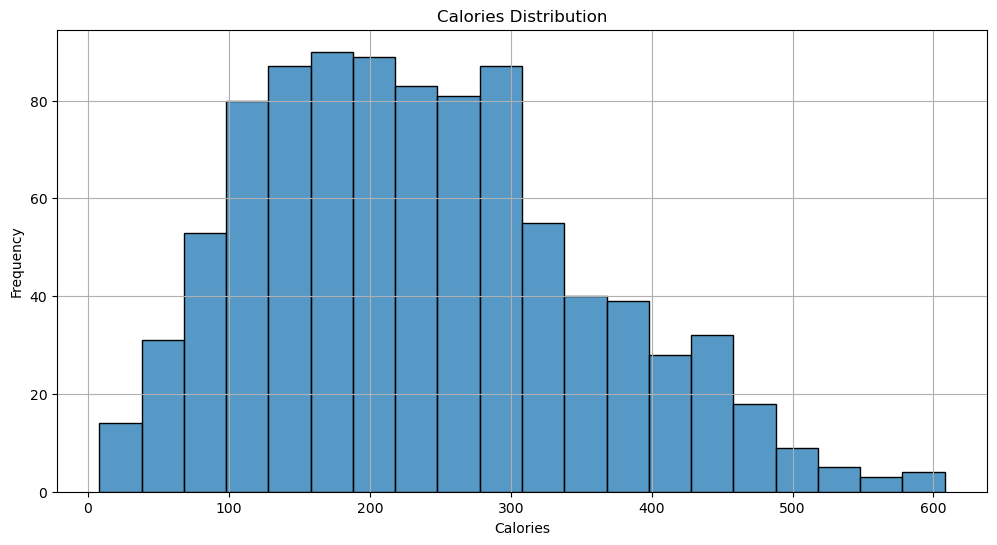

In [81]:
# 1. Calories Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['calories'], bins=20)
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid()
plt.show()

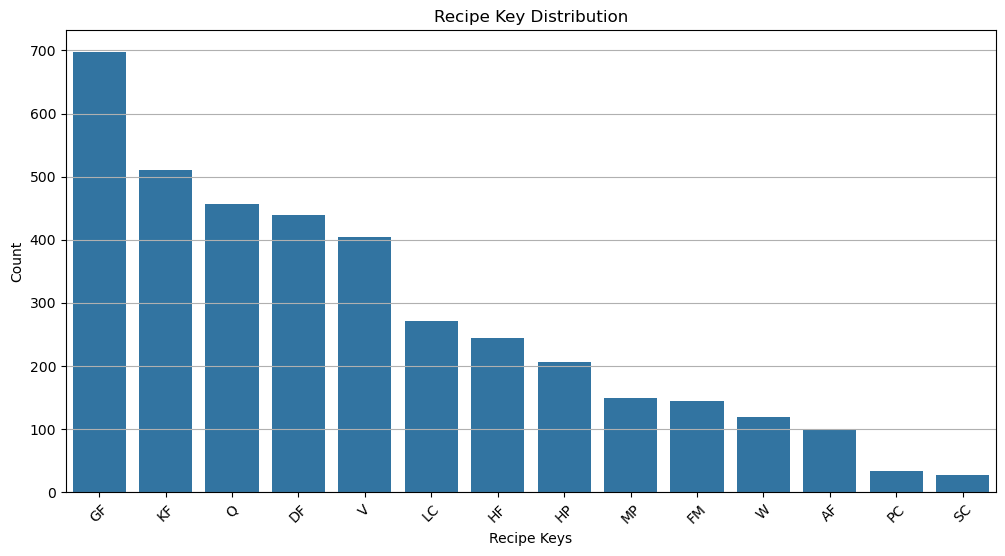

In [65]:
# 2. Recipe Key Distribution
# Exploding the keys to create a long format for count plotting
keys_exploded = df_cleaned.explode('keys')

plt.figure(figsize=(12, 6))
sns.countplot(data=keys_exploded, x='keys', order=keys_exploded['keys'].value_counts().index)
plt.title('Recipe Key Distribution')
plt.xlabel('Recipe Keys')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

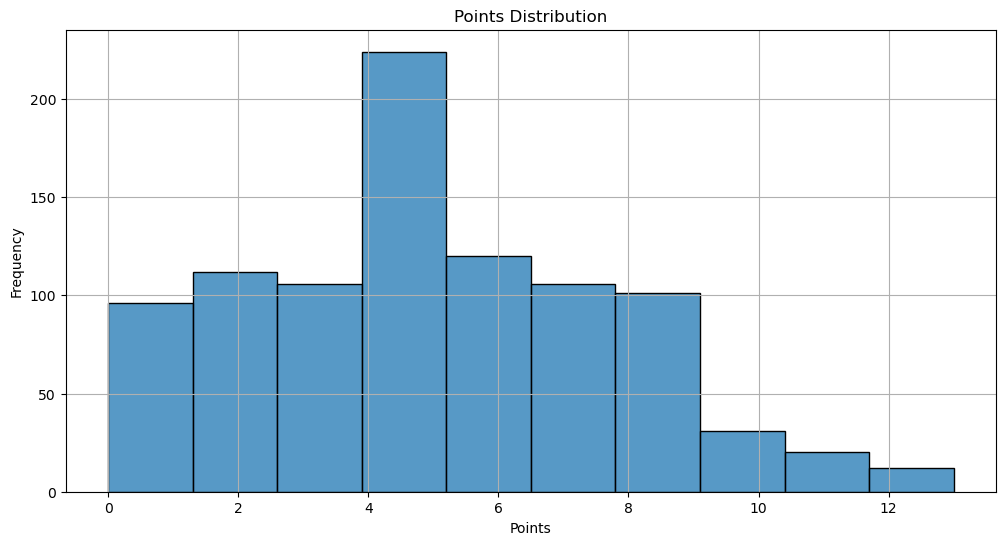

In [91]:
# 3. Points Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['points'], bins=10)
plt.title('Points Distribution')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [111]:
from IPython.display import HTML,display

In [154]:
def image_formatter(url):
    return '<img src="'+ url + '" width="60" >'

In [178]:
def filter_recipe(calorie_range:tuple, point_range:tuple, data: pd.DataFrame ):
  data_to_use = data.copy()
  min_calorie,max_calorie = calorie_range
  min_point,max_point = point_range
  # Filter points
  filtered_data = data_to_use[
    (data_to_use["points"]>=min_point) & 
    (data_to_use["points"]<=max_point) &
    (data_to_use["calories"]>=min_calorie) &
    (data_to_use["calories"]<=max_calorie)
    ]
  
  filtered_data['image'] = filtered_data['image'].apply(lambda x : image_formatter(x))
  
  # print(filtered_data.head())
  return display(HTML(filtered_data
               .sort_values(by='calories',ascending=False)
               .head(10)
               .to_html(escape=False)))
  # filtered_data.sort_values(by='calories').head(10).to_html('webpage.html',escape=False)  
  
  

In [182]:
df_cleaned.head()

,name,image,keys,points,calories,summary
1,Apple Butter,https://www.skinnytaste.com/wp-content/uploads...,"[DF, GF, KF, V]",1,34.0,This easy apple butter recipe simmers on the s...
2,Roasted Delicata Squash,https://www.skinnytaste.com/wp-content/uploads...,"[DF, GF, V]",4,177.0,"Roasted Delicata Squash with toasted almonds, ..."
3,Apple Bread,https://www.skinnytaste.com/wp-content/uploads...,[V],4,124.0,Moist cinnamon apple bread recipe made with ap...
4,Autumn Salad with Pears and Gorgonzola,https://www.skinnytaste.com/wp-content/uploads...,"[GF, LC, Q, V]",5,175.0,I love a good salad with lots of texture and f...
5,Sesame Chicken,https://www.skinnytaste.com/wp-content/uploads...,"[DF, FM, GF, HP]",9,513.0,This lighter Sesame Chicken recipe features ch...


In [179]:
filter_recipe((60,200),(3,5),df_cleaned)

C:\Users\agbec\AppData\Local\Temp\ipykernel_26708\1746327382.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['image'] = filtered_data['image'].apply(lambda x : image_formatter(x))


,name,image,keys,points,calories,summary
40,Soy-Marinated Beef and Broccoli Skewers,,"[DF, GF, HP, KF]",5,199.0,"If you love beef and broccoli stir fry, you’ll love these soy-marinated Beef and Broccoli Skewers! A delicious summer dinner idea!"
449,Turmeric Roasted Sweet Potato and Macadamia Soup,,"[DF, FM, GF, HF, V, W]",5,199.0,"This vegan, Turmeric Roasted Sweet Potato Soup is creamy and dairy-free with macadamia nuts, ginger, and a squeeze of lime juice."
688,Spanakopita Baked Eggs,,"[GF, HF, LC, V, W]",3,198.0,"These Baked Eggs are inspired by the Greek spinach pie Spanakopita using the same flavorful spinach filling, only baked with eggs."
79,Italian Shrimp Salad,,"[DF, HP, LC, MP, Q, W]",4,198.0,"This garlicky Italian Shrimp Salad recipe is loaded with shrimp, celery, and a mix of bold Italian olives, all brightened with a lemony dressing."
643,"Grilled Steak With Tomatoes, Red Onion and Balsamic",,"[GF, KF, LC, Q, W]",5,198.0,"One of my favorite ways to make grilled steak in the summer. Topped with fresh chopped tomatoes, red onion, balsamic and oil. It’s fresh and a great way to enjoy those end-of-summer tomatoes!"
686,Spicy Crunchy Tuna Tartare,,"[DF, GF, LC, Q]",3,197.6,"Spicy Crunchy Tuna Tartare is my favorite restaurant appetizer that’s so easy to make yourself and will impress your guests! Made with tuna, avocado and some panko for crunch."
851,Sesame Encrusted Chicken Tenders,,"[LC, Q]",4,197.0,"If you like the taste of sesame seeds as much as I do, you’ll love these Sesame Encrusted Chicken Tenders coated with sesame seeds, panko and a hint of soy sauce. Bake them or make them in the air fryer!"
138,Mushroom Toast,,"[Q, V]",5,196.0,"Mushroom Toast with labneh or cream cheese served on sourdough toast is a fast and easy breakfast, brunch, or lunch."
944,Grilled Vegetable Platter with Yogurt Mint Sauce,,"[GF, HF, LC, Q, V]",3,196.0,"This beautiful, Grilled Vegetables Platter with Yogurt Mint Sauce is so colorful and delicious. An easy summer side dish made with asparagus, zucchini, squash, red onion and bell peppers."
615,Turkey Cutlets with Parmesan Crust,,"[KF, Q]",3,196.0,"These golden, crisp Turkey Cutlets with Parmesan Crust, pan-fried or air-fried, are a quick weeknight dish the whole family will love!"
